# Standard Genetic Algo

In [1]:
from random import randint, uniform
n_pop = 10
n_bits = 8
n_iter = 5
r_cross = 0.8 # crossover rate
r_mut = 0.1 # flip bits with probability

In [2]:
def objective(candidate):
    sum_ = 0
    for bit in candidate:
        sum_ += bit
    return sum_

In [3]:
def selection(pop,scores,k=3):
    # first random selection
    selection_ix = randint(0,len(pop)-1)
    for ix in [randint(0,len(pop)-1) for x in range(k-1)]:
    # check if better (e.g. perform a tournament)
        if scores[ix] < scores[selection_ix]:
            selection_ix = ix
    return pop[selection_ix]

In [4]:
# crossover two parents to create two children
def crossover(p1,p2,r_cross):
    print([p1,p2])
    # children are copies of parents by default
    c1 , c2 = p1.copy(), p2.copy()
    # check for recombination
    if uniform(0,1) < r_cross:
        # select crossover point that is not on the end of the string
        pt = randint(1, len(p1)-2)
        # perform crossover
        c1 = p1[:pt] + p2[pt:]
        c2 = p2[:pt] + p1[pt:]
    return [c1,c2]

In [5]:
def mutation(bitstring, r_mut):
    for i in range(len(bitstring)):
        # check for a mutation
        if uniform(0,1) < r_mut:
            # flip the bit
            bitstring[i] = 1 - bitstring[i]

In [6]:
def genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut):
    # initial population of random bitstring
    pop = [[randint(0,1) for x in range(n_bits)] for _ in range(n_pop)]
    print(pop)
    # keep track of best solution
    best, best_eval = 0, objective(pop[0])
    # enumerate generations
    for gen in range(n_iter):
        # evaluate all candidates in the population
        scores = [objective(c) for c in pop]
        # check for new best solution
        for i in range(n_pop):
            if scores[i] < best_eval:
                best, best_eval = pop[i], scores[i]
                print(">%d, new best f(%s) = %.3f" % (gen, pop[i], scores[i]))
        # select parents
        selected = [selection(pop, scores) for _ in range(n_pop)]
        # create the next generation
        children = list()
        for i in range(0, n_pop, 2):
            # get selected parents in pairs
            p1, p2 = selected[i], selected[i+1]
            # crossover and mutation
            for c in crossover(p1, p2, r_cross):
                # mutation
                mutation(c, r_mut)
                # store for next generation
                children.append(c)
        # replace population
        pop = children
    return [best, best_eval]

In [7]:
genetic_algorithm(objective, n_bits, n_iter, n_pop, r_cross, r_mut)

[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 1, 0, 0, 1, 1], [1, 0, 0, 0, 0, 0, 1, 1], [1, 0, 1, 1, 0, 0, 1, 1], [0, 1, 1, 1, 1, 0, 0, 1], [1, 0, 1, 1, 0, 0, 1, 1], [0, 1, 1, 0, 0, 0, 1, 0], [0, 1, 0, 1, 0, 1, 1, 0], [1, 0, 1, 0, 1, 0, 0, 1]]
[[0, 1, 1, 0, 0, 0, 1, 0], [1, 0, 1, 0, 1, 0, 0, 1]]
[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 1, 1]]
[[0, 0, 0, 0, 0, 0, 1, 1], [0, 1, 1, 0, 0, 0, 1, 0]]
[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1]]
[[0, 0, 0, 1, 0, 0, 1, 1], [0, 1, 1, 0, 0, 0, 1, 0]]
[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 1, 0, 0, 0, 1, 0]]
[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1]]
[[0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 1, 1]]
[[0, 0, 1, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1]]
[[0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 1, 1]]
[[0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 1]]
[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1]]
[[0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1]]
[[0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1

[[0, 0, 0, 0, 0, 0, 0, 0], 0]

# P&L Table Creation

Target: (rank((vwap - close)) / rank((vwap + close)))
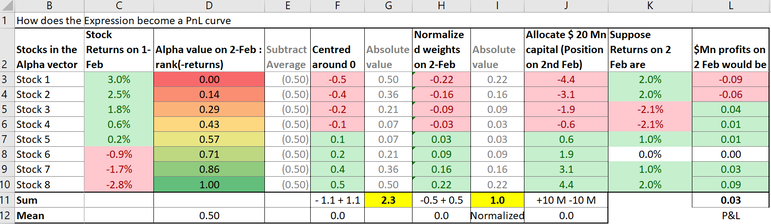

In [8]:
14/100

0.14

In [9]:
6/22

0.2727272727272727

In [10]:
import pandas as pd
from datetime import date

In [11]:
tickers = ['PLD','AMT','PSA','SPG','DLR','EQR']
files_array = {}

for ticker in tickers:
    files_array[ticker] = pd.read_excel('yahoo_finance_reits_data.xlsx',sheet_name=ticker,index_col=0).reset_index()

In [12]:
files_array

{'PLD':            Date        Open        High         Low       Close   Volume  \
 0    1997-11-21    8.356568    8.356568    8.089869    8.178769  3821400   
 1    1997-11-24    8.178769    8.178769    7.912070    8.089869   541600   
 2    1997-11-25    8.134319    8.178769    8.067645    8.178769   425000   
 3    1997-11-26    8.178769    8.178769    8.089869    8.089869   165200   
 4    1997-11-28    8.089869    8.178769    8.089869    8.178769    60500   
 ...         ...         ...         ...         ...         ...      ...   
 6482 2023-08-29  123.970001  125.349998  122.760002  125.099998  1833500   
 6483 2023-08-30  125.489998  125.959999  124.699997  125.699997  1849300   
 6484 2023-08-31  125.360001  125.910004  123.889999  124.199997  3277600   
 6485 2023-09-01  125.400002  125.570000  124.050003  124.589996  1591000   
 6486 2023-09-05  124.250000  124.500000  121.860001  122.050003  2854100   
 
       Dividends  Stock Splits  
 0           0.0             0  
 

In [13]:
one.reset_index(inplace=True)

NameError: name 'one' is not defined

In [50]:
string = '(Open+Close+High)/3'
dataframes = ['Open','Close','High','Low','Volume']
def create_expression(string):
    for field in dataframes:
        string = string.replace(field,f'x[\'{field}\']')
    return string

print(create_expression(string))

(x['Open']+x['Close']+x['High'])/3


In [52]:
one = files_array['PLD']
def day_average(df,string):
    df['Day Ave'] = df.apply(lambda x: eval(create_expression(string)), axis=1)
    return df
day_average(one,string)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day Ave,Yesterday Ave,Dod Return,Tommorrow Ave,2nd Dod Return
0,1997-11-21,8.356568,8.356568,8.089869,8.178769,3821400,0.0,0,8.297302,NaN,NaN,8.149136,-1.785714e-02
1,1997-11-24,8.178769,8.178769,7.912070,8.089869,541600,0.0,0,8.149136,8.297302,-1.785714e-02,8.163953,1.818175e-03
2,1997-11-25,8.134319,8.178769,8.067645,8.178769,425000,0.0,0,8.163953,8.149136,1.818175e-03,8.149136,-1.814876e-03
3,1997-11-26,8.178769,8.178769,8.089869,8.089869,165200,0.0,0,8.149136,8.163953,-1.814876e-03,8.149136,-6.406794e-09
4,1997-11-28,8.089869,8.178769,8.089869,8.178769,60500,0.0,0,8.149136,8.149136,-6.406794e-09,8.208403,7.272784e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6482,2023-08-29,123.970001,125.349998,122.760002,125.099998,1833500,0.0,0,124.806666,124.183332,5.019468e-03,125.716665,7.291266e-03
6483,2023-08-30,125.489998,125.959999,124.699997,125.699997,1849300,0.0,0,125.716665,124.806666,7.291266e-03,125.156667,-4.454442e-03
6484,2023-08-31,125.360001,125.910004,123.889999,124.199997,3277600,0.0,0,125.156667,125.716665,-4.454442e-03,125.186666,2.396898e-04
6485,2023-09-01,125.400002,125.570000,124.050003,124.589996,1591000,0.0,0,125.186666,125.156667,2.396898e-04,123.600001,-1.267439e-02


In [54]:
def returns(df):
    df['Yesterday Ave'] = df['Day Ave'].shift()
    df['Dod Return'] = (df['Day Ave'] - df['Yesterday Ave'])/abs(df['Yesterday Ave'])
    df['Tommorrow Ave'] = df['Day Ave'].shift(-1)
    df['2nd Dod Return'] = (df['Tommorrow Ave'] - df['Day Ave'])/abs(df['Day Ave'])
    return df
returns(one)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Day Ave,Yesterday Ave,Dod Return,Tommorrow Ave,2nd Dod Return
0,1997-11-21,8.356568,8.356568,8.089869,8.178769,3821400,0.0,0,8.297302,NaN,NaN,8.149136,-1.785714e-02
1,1997-11-24,8.178769,8.178769,7.912070,8.089869,541600,0.0,0,8.149136,8.297302,-1.785714e-02,8.163953,1.818175e-03
2,1997-11-25,8.134319,8.178769,8.067645,8.178769,425000,0.0,0,8.163953,8.149136,1.818175e-03,8.149136,-1.814876e-03
3,1997-11-26,8.178769,8.178769,8.089869,8.089869,165200,0.0,0,8.149136,8.163953,-1.814876e-03,8.149136,-6.406794e-09
4,1997-11-28,8.089869,8.178769,8.089869,8.178769,60500,0.0,0,8.149136,8.149136,-6.406794e-09,8.208403,7.272784e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6482,2023-08-29,123.970001,125.349998,122.760002,125.099998,1833500,0.0,0,124.806666,124.183332,5.019468e-03,125.716665,7.291266e-03
6483,2023-08-30,125.489998,125.959999,124.699997,125.699997,1849300,0.0,0,125.716665,124.806666,7.291266e-03,125.156667,-4.454442e-03
6484,2023-08-31,125.360001,125.910004,123.889999,124.199997,3277600,0.0,0,125.156667,125.716665,-4.454442e-03,125.186666,2.396898e-04
6485,2023-09-01,125.400002,125.570000,124.050003,124.589996,1591000,0.0,0,125.186666,125.156667,2.396898e-04,123.600001,-1.267439e-02


In [40]:
combi = pd.DataFrame(one.reset_index()['Date'])
for key,value in files_array.items():
    day_average(value)
    returns(value)
    dod_return = pd.DataFrame(value[['Date','Dod Return']])
    dod_return.rename(columns={'Dod Return':f'{key} Dod Return'},inplace=True)
    combi = combi.merge(dod_return,on='Date',how='left')

In [41]:
combi

,Date,PLD Dod Return,AMT Dod Return,PSA Dod Return,SPG Dod Return,DLR Dod Return,EQR Dod Return
0,1997-11-21,NaN,NaN,7.575758e-04,-0.004444,NaN,0.000416
1,1997-11-24,-1.785714e-02,NaN,0.000000e+00,0.009567,NaN,-0.002077
2,1997-11-25,1.818175e-03,NaN,-1.847748e-07,-0.008844,NaN,-0.005412
3,1997-11-26,-1.814876e-03,NaN,1.362614e-02,-0.001276,NaN,-0.001675
4,1997-11-28,-6.406794e-09,NaN,-1.493747e-03,0.002553,NaN,0.004613
...,...,...,...,...,...,...,...
6482,2023-08-29,5.019468e-03,0.012066,1.703966e-03,0.009716,0.016932,0.001902
6483,2023-08-30,7.291266e-03,0.013178,8.146076e-03,0.007615,0.014150,0.009648
6484,2023-08-31,-4.454442e-03,-0.001913,-4.206448e-03,-0.001787,0.005540,-0.005134
6485,2023-09-01,2.396898e-04,-0.003924,-6.586978e-03,0.010887,0.006243,-0.007715


In [21]:
combination = combi.melt(['Date'], var_name='Ticker', value_name='Dod Return') #need to double melt 2nd dod return
combination.sort_values('Date', inplace=True)
combination.dropna(inplace=True)
combination

,Date,Ticker,Dod Return
32435,1997-11-21,EQR Dod Return,0.000416
19461,1997-11-21,SPG Dod Return,-0.004444
12974,1997-11-21,PSA Dod Return,0.000758
19462,1997-11-24,SPG Dod Return,0.009567
12975,1997-11-24,PSA Dod Return,0.000000
...,...,...,...
25947,2023-09-05,SPG Dod Return,0.002409
12973,2023-09-05,AMT Dod Return,-0.004306
6486,2023-09-05,PLD Dod Return,-0.012674
32434,2023-09-05,DLR Dod Return,-0.008515


In [22]:
combi2 = pd.DataFrame(one.reset_index()['Date'])
for key,value in files_array.items():
    day_average(value)
    returns(value)
    #value.reset_index(inplace=True)
    dod_return = pd.DataFrame(value[['Date','2nd Dod Return']])
    dod_return.rename(columns={'2nd Dod Return':f'{key} Dod Return'},inplace=True)
    combi2 = combi2.merge(dod_return,on='Date',how='left')

In [23]:
combi2

,Date,PLD Dod Return,AMT Dod Return,PSA Dod Return,SPG Dod Return,DLR Dod Return,EQR Dod Return
0,1997-11-21,-1.785714e-02,NaN,0.000000e+00,0.009567,NaN,-0.002077
1,1997-11-24,1.818175e-03,NaN,-1.847748e-07,-0.008844,NaN,-0.005412
2,1997-11-25,-1.814876e-03,NaN,1.362614e-02,-0.001276,NaN,-0.001675
3,1997-11-26,-6.406794e-09,NaN,-1.493747e-03,0.002553,NaN,0.004613
4,1997-11-28,7.272784e-03,NaN,3.739812e-03,0.003182,NaN,-0.001253
...,...,...,...,...,...,...,...
6482,2023-08-29,7.291266e-03,0.013178,8.146076e-03,0.007615,0.014150,0.009648
6483,2023-08-30,-4.454442e-03,-0.001913,-4.206448e-03,-0.001787,0.005540,-0.005134
6484,2023-08-31,2.396898e-04,-0.003924,-6.586978e-03,0.010887,0.006243,-0.007715
6485,2023-09-01,-1.267439e-02,-0.004306,-1.245645e-02,0.002409,-0.008515,-0.003965


In [24]:
combination2 = combi2.melt(['Date'], var_name='Ticker', value_name='2nd Dod Return') #need to double melt 2nd dod return
combination2.sort_values('Date', inplace=True)
combination2.dropna(inplace=True)
combination2

,Date,Ticker,2nd Dod Return
0,1997-11-21,PLD Dod Return,-0.017857
32435,1997-11-21,EQR Dod Return,-0.002077
19461,1997-11-21,SPG Dod Return,0.009567
12974,1997-11-21,PSA Dod Return,0.000000
19462,1997-11-24,SPG Dod Return,-0.008844
...,...,...,...
19459,2023-09-01,PSA Dod Return,-0.012456
38920,2023-09-01,EQR Dod Return,-0.003965
6485,2023-09-01,PLD Dod Return,-0.012674
25946,2023-09-01,SPG Dod Return,0.002409


In [25]:
combination3 = combination.merge(combination2,how='left',on=['Date','Ticker'])

In [26]:
combination3

,Date,Ticker,Dod Return,2nd Dod Return
0,1997-11-21,EQR Dod Return,0.000416,-2.077046e-03
1,1997-11-21,SPG Dod Return,-0.004444,9.566992e-03
2,1997-11-21,PSA Dod Return,0.000758,0.000000e+00
3,1997-11-24,SPG Dod Return,0.009567,-8.843721e-03
4,1997-11-24,PSA Dod Return,0.000000,-1.847748e-07
...,...,...,...,...
37106,2023-09-05,SPG Dod Return,0.002409,NaN
37107,2023-09-05,AMT Dod Return,-0.004306,NaN
37108,2023-09-05,PLD Dod Return,-0.012674,NaN
37109,2023-09-05,DLR Dod Return,-0.008515,NaN


In [27]:
combination3['Rank'] = combination3.sort_values(['Dod Return'], ascending=[True]).groupby(['Date']).cumcount() + 1

In [28]:
len(tickers)

6

In [29]:
combination3['Alpha Rank'] = combination3['Rank'].apply(lambda x: x * (1/(len(tickers)-1)) - (1/(len(tickers)-1)))
combination3['Centered 0'] = combination3['Alpha Rank'] - 0.5
combination3['Abs Centered 0'] = abs(combination3['Centered 0'])

In [30]:
combination3[-21:-11]

,Date,Ticker,Dod Return,2nd Dod Return,Rank,Alpha Rank,Centered 0,Abs Centered 0
37090,2023-08-30,SPG Dod Return,0.007615,-0.001787,2,0.2,-0.3,0.3
37091,2023-08-30,DLR Dod Return,0.014150,0.005540,6,1.0,0.5,0.5
37092,2023-08-30,EQR Dod Return,0.009648,-0.005134,4,0.6,0.1,0.1
37093,2023-08-31,AMT Dod Return,-0.001913,-0.003924,4,0.6,0.1,0.1
37094,2023-08-31,PSA Dod Return,-0.004206,-0.006587,3,0.4,-0.1,0.1
37095,2023-08-31,EQR Dod Return,-0.005134,-0.007715,1,0.0,-0.5,0.5
37096,2023-08-31,PLD Dod Return,-0.004454,0.000240,2,0.2,-0.3,0.3
37097,2023-08-31,SPG Dod Return,-0.001787,0.010887,5,0.8,0.3,0.3
37098,2023-08-31,DLR Dod Return,0.005540,0.006243,6,1.0,0.5,0.5
37099,2023-09-01,AMT Dod Return,-0.003924,-0.004306,3,0.4,-0.1,0.1


In [31]:
combination3['Sum Rank'] = combination3.apply(lambda x: sum(combination3[combination3['Date']==x['Date']]['Abs Centered 0']),axis=1)

In [32]:
combination3['Normalized'] = combination3.apply(lambda x: -x['Abs Centered 0']/x['Sum Rank'] if x['Centered 0'] < 0 else x['Abs Centered 0']/x['Sum Rank'], axis=1)

In [33]:
combination3['Allocated'] = combination3['Normalized'] * 20

In [34]:
combination3['PnL'] = combination3['Allocated'] * combination3['2nd Dod Return']

In [35]:
combination3[-21:-11]

,Date,Ticker,Dod Return,2nd Dod Return,Rank,Alpha Rank,Centered 0,Abs Centered 0,Sum Rank,Normalized,Allocated,PnL
37090,2023-08-30,SPG Dod Return,0.007615,-0.001787,2,0.2,-0.3,0.3,1.8,-0.166667,-3.333333,0.005956
37091,2023-08-30,DLR Dod Return,0.014150,0.005540,6,1.0,0.5,0.5,1.8,0.277778,5.555556,0.030780
37092,2023-08-30,EQR Dod Return,0.009648,-0.005134,4,0.6,0.1,0.1,1.8,0.055556,1.111111,-0.005704
37093,2023-08-31,AMT Dod Return,-0.001913,-0.003924,4,0.6,0.1,0.1,1.8,0.055556,1.111111,-0.004360
37094,2023-08-31,PSA Dod Return,-0.004206,-0.006587,3,0.4,-0.1,0.1,1.8,-0.055556,-1.111111,0.007319
37095,2023-08-31,EQR Dod Return,-0.005134,-0.007715,1,0.0,-0.5,0.5,1.8,-0.277778,-5.555556,0.042862
37096,2023-08-31,PLD Dod Return,-0.004454,0.000240,2,0.2,-0.3,0.3,1.8,-0.166667,-3.333333,-0.000799
37097,2023-08-31,SPG Dod Return,-0.001787,0.010887,5,0.8,0.3,0.3,1.8,0.166667,3.333333,0.036290
37098,2023-08-31,DLR Dod Return,0.005540,0.006243,6,1.0,0.5,0.5,1.8,0.277778,5.555556,0.034683
37099,2023-09-01,AMT Dod Return,-0.003924,-0.004306,3,0.4,-0.1,0.1,1.8,-0.055556,-1.111111,0.004784


In [36]:
final = combination3[['Date','PnL']]
pnl = final.groupby(['Date']).sum()

In [37]:
pnl['PnL'] = pnl['PnL'].cumsum()

In [38]:
pnl.reset_index(inplace=True)

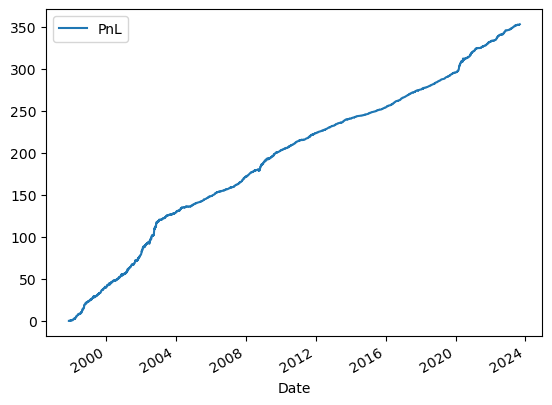

In [39]:
pnl.plot(kind='line',x='Date',y='PnL');